<h2> DATA 319: Model-based and Data-based Methods for Data Analytics. Spring 2024 </h2>
<h3> Midterm Exam </h3>
<h3> <i> Type your name here </i></h3>

#### 1. Assume that you are operating with a dataset that includes following variables for a large sample of individuals (employees): age, salary, gender, marital status. Provide an appropriate hypothesis test (univariate tests: t-test for one or more samples, ANOVA test for three or more samples (one-factor ANOVA or multi-factor ANOVA); multivariate tests: multivariate $T^2$ test, multivariate ANOVA) for each of the tasks below and briefly (one sentence is enough) justify your choice:

##### (a) Testing that the population mean age of employees equals to some hypothesized value.

##### (b) Testing simultaneously (at the same time) that the population mean age and population mean salary of employees equals to some respective hypothesized values.

##### (c) Testing that the difference between population mean salaries of married vs single employees equals to some hypothesized value (or equals to zero if testing that there is no difference).

##### (d) Testing that the difference between population mean salaries of married male vs married female employees equals to some hypothesized value (or equals to zero if testing that there is no difference). Assume that we managed to sample groups such that we obtained spousal data (male and female employees are husbands and wifes of each other). 

##### (e) Testing that the difference between population mean salaries of married male vs married female employees equals to some hypothesized value (or equals to zero if testing that there is no difference). Assume that we sampled both groups randomly here (i.e. there is no spousal connection between samples).

##### (f) The gender variable includes also third category "other/prefer not to reveal my gender". Given this, consider testing that there is no difference in population mean ages between these three categories for gender identity. 

##### (g) Testing simultaneously (at the same time) that there is no difference both in population mean ages and population mean salaries between these three categories for gender identity. 

##### (h) Testing that there is no difference in population mean salaries between the groups differing both by their gender identity and their marital status.

##### 2. Compute the Jaccard similarities: 

##### (a) for each pair of the following three sets (Jaccard set similarity): $\{1, 2, 3, 4\}$, $\{2, 3, 6, 7\}$, and $\{2, 4, 5\}$.

##### (b) for each pair of the following three bags (Jaccard bag similarity): $\{1, 1, 2, 2\}$, $\{1, 1, 1, 2, 3\}$, and $\{1, 2, 3, 4\}$.

*Note that you are encouraged but not required to use Python to obtain the answers for these questions. If you opt out from using Python in favor of "paper-and-pencil" (i.e. no coding involved) approach, then show your work to get full credit (reporting just answers will not be sufficient)*

In [1]:
from collections import Counter

def jaccard_similarity(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return intersection_size / union_size

def jaccard_similarity_bag(bag1, bag2):
    counter1 = Counter(bag1)
    counter2 = Counter(bag2)
    intersection_size = sum((counter1 & counter2).values())
    union_size = sum((counter1 | counter2).values())
    return intersection_size / union_size

# Sets
set1 = {1, 2, 3, 4}
set2 = {2, 3, 6, 7}
set3 = {2, 4, 5}

# Bags
bag1 = [1, 1, 2, 2]
bag2 = [1, 1, 1, 2, 3]
bag3 = [1, 2, 3, 4]

print("Jaccard similarities for sets:")
print("Set1 vs Set2:", jaccard_similarity(set1, set2))
print("Set1 vs Set3:", jaccard_similarity(set1, set3))
print("Set2 vs Set3:", jaccard_similarity(set2, set3))

print("\nJaccard similarities for bags:")
print("Bag1 vs Bag2:", jaccard_similarity_bag(bag1, bag2))
print("Bag1 vs Bag3:", jaccard_similarity_bag(bag1, bag3))
print("Bag2 vs Bag3:", jaccard_similarity_bag(bag2, bag3))

Jaccard similarities for sets:
Set1 vs Set2: 0.3333333333333333
Set1 vs Set3: 0.4
Set2 vs Set3: 0.16666666666666666

Jaccard similarities for bags:
Bag1 vs Bag2: 0.5
Bag1 vs Bag3: 0.3333333333333333
Bag2 vs Bag3: 0.5


#### 3. Suppose there are 100 items, numbered 1 to 100, and also 100 baskets, also numbered 1 to 100. Item i is in basket b if and only if i divides b with no remainder. Thus, item 1 is in all the baskets, item 2 is in all fifty of the even-numbered baskets, and so on. Basket 12 consists of items $\{1, 2, 3, 4, 6, 12\}$, since these are all the integers that divide 12. Answer the following questions:

##### (a) If the basket is a prime number, how many items will it consist of?

##### (b) Which basket is the largest (i.e. it consists of the largest count of items)?

##### (c) If the support threshold is 6, which items are frequent?

##### (d) Apply the A-Priori Algorithm with support threshold 6 to this data to determine all frequent itemsets.

##### (e) What is the interest of the following association rules?
i. $\{5, 7\}\rightarrow2$

ii. $\{2, 3, 4\}\rightarrow5$

*Note that you are encouraged but not required to use Python to obtain the answers for these questions. If you opt out from using Python in favor of "paper-and-pencil" (i.e. no coding involved) approach, then show your work to get full credit (reporting just answers will not be sufficient)*

In [2]:
import numpy as np
from mlxtend.frequent_patterns import apriori
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

C:\Users\avitr\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def divisors_count(n):
    count = 0
    for i in range(1, int(n**0.5) + 1):
        if n % i == 0:
            count += 1
            if i != n // i:
                count += 1
    return count

# (a) If the basket is a prime number, how many items will it consist of?
prime_basket_items = {p: divisors_count(p) for p in range(2, 101) if all(p % d != 0 for d in range(2, int(p**0.5) + 1))}
print("Items in prime number baskets:", prime_basket_items)

# (b) Which basket is the largest?

itemsets_list = []

for basket in range(1,101,1):
    items = []
    for item in range(1,101,1):
        if basket%item==0:
            items.append(item)
    itemsets_list.append(items)
x = np.array([len(basket) for basket in itemsets_list]).argmax() + 1
print("Which basket is the largest:",x)

Items in prime number baskets: {2: 2, 3: 2, 5: 2, 7: 2, 11: 2, 13: 2, 17: 2, 19: 2, 23: 2, 29: 2, 31: 2, 37: 2, 41: 2, 43: 2, 47: 2, 53: 2, 59: 2, 61: 2, 67: 2, 71: 2, 73: 2, 79: 2, 83: 2, 89: 2, 97: 2}
Which basket is the largest: 60


In [4]:
# C

# Flatten the list of itemsets
all_items = [item for sublist in itemsets_list for item in sublist]

# Count the occurrences of each item
item_counts = Counter(all_items)

# Filter items that meet or exceed the support threshold
support_threshold = 6
frequent_items = [item for item, count in item_counts.items() if count >= support_threshold]

# Print frequent items
print("Frequent Items with Support Threshold 6:")
print(frequent_items)

Frequent Items with Support Threshold 6:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [5]:
# D

te = TransactionEncoder()
te_ary = te.fit(itemsets_list).transform(itemsets_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the A-Priori algorithm with support threshold 6
min_support = 6 / len(df) 
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets with Support Threshold 6:")
print(frequent_itemsets)

Frequent Itemsets with Support Threshold 6:
     support             itemsets
0       1.00                  (1)
1       0.50                  (2)
2       0.33                  (3)
3       0.25                  (4)
4       0.20                  (5)
..       ...                  ...
124     0.08     (1, 2, 4, 6, 12)
125     0.06     (1, 2, 4, 8, 16)
126     0.08     (1, 3, 4, 6, 12)
127     0.08     (2, 3, 4, 6, 12)
128     0.08  (1, 2, 3, 4, 6, 12)

[129 rows x 2 columns]


In [6]:
# E
# Define the baskets
baskets = itemsets_list

count_c = sum(2 in basket for basket in baskets)

count_mb = 0
count_c_mb = 0
for basket in baskets:
    if 5 in basket and 7 in basket:
        count_mb += 1
        if 2 in basket:
            count_c_mb += 1

# Calculate the probabilities
prob_c = count_c / len(baskets)
prob_c_mb = count_c_mb / count_mb

# Calculate the interest
interest = abs(prob_c_mb - prob_c)

print("Interest of the association rule {5, 7} -> 2:", interest)


Interest of the association rule {5, 7} -> 2: 0.0


In [7]:
# E
# Define the baskets
baskets = itemsets_list

count_c = sum(5 in basket for basket in baskets)

count_mb = 0
count_c_mb = 0
for basket in baskets:
    if 2 in basket and 3 in basket and 4 in basket:
        count_mb += 1
        if 5 in basket:
            count_c_mb += 1

# Calculate the probabilities
prob_c = count_c / len(baskets)
prob_c_mb = count_c_mb / count_mb

# Calculate the interest
interest = abs(prob_c_mb - prob_c)

print("Interest of the association rule {2,3,4} -> 5:", interest)


Interest of the association rule {2,3,4} -> 5: 0.07500000000000001


#### 4. Consider the following multivariate dataset (we used this dataset before in PS3).

#### $X = \begin{bmatrix}2&2&3\\0&0&2\\-1&3&2\\0&1&1\\0&1&5\\0&1&3\\1&-1&3\\1&0&5\end{bmatrix}$

##### (a) Suppose that each column of this dataset represent the same variable for different groups/classes. How would you test if the population mean across all three groups is equal? State your null hypothesis. 

##### (b) Perform a hypothesis test at the α = .05 significance level. What is the test statistic used for this test? Report the p-value of the test and your test decision.

#### 5. This problem references the `dairy.csv` dataset, which includes the data on the cost of transporting milk from farms to dairy plant, a survey was taken of firms engaged in milk transportation. Cost data on $X_1$ =fuel, $X_2$ =repair, and $X_3$ =capital, all measured on a per-mile basis for $n_1$ = 36 gasoline and $n_2$ = 23 diesel trucks.

##### (a) *Use Python* to compute the sample averages (column means) for each of the cost variables, first for an entire dataset (without differentiating between truck types), then for gasoline and diesel trucks separately.

##### (b) *Use Python* to determine which truck has the largest combined Fuel, Repair, and Capital cost. Repeat the exercise for gasoline and diesel trucks separately.

##### (c) Make a scatterplot of Fuel vs. Repair costs for the full dataset, with the points colored by trucks type.

##### (d) Evaluate whether Fuel, Repair, and Capital cost data arise from multivariate normal distribution using visual analysis tools. Construct univariate histograms, univariate probability plots, and pairwise scatterplots.

##### (e) Perform Hotellings $T^2$ tests on the dairy dataset (without differentiation between truck types), for the three vectors:

##### $\mu_0 = (12, 8, 10) ~~~~~~~~~~~ \mu_1 = (10, 18, 10) ~~~~~~~~~~~ \mu_2 = (11, 9, 13)$

##### Use α = .05 significance level. Report the value of your test statistics and the critical value of the tests. Report the p-value and your decision for each of these three tests. 

##### (f) Compute individual confidence intervals (using t-distribution) for the mean of each of the three variables. Then compute the simultaneous $T^2$ confidence intervals and simultaneous confidence intervals using Bonferroni correction. Use 95% confidence level. Summarize the results of these tests in your own words: out of these three types of intervals, which one is the widest, and which one is the narrowest?

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('dairy (1).csv')

In [10]:
df.head()

,Fuel,Repair,Capital,Type
0,16.44,12.43,11.23,gasoline
1,7.19,2.70,3.92,gasoline
2,9.92,1.35,9.75,gasoline
3,4.24,5.78,7.78,gasoline
4,11.20,5.05,10.67,gasoline


In [11]:
# A
df[['Fuel' ,'Repair' ,'Capital']].mean(axis=0)

Fuel       11.394915
Repair      9.145424
Capital    12.934068
dtype: float64

In [12]:
df.groupby(['Type']).mean()

,Fuel,Repair,Capital
Type,,,
diesel,10.105652,10.762174,18.167826
gasoline,12.218611,8.112500,9.590278


In [13]:
# B

In [14]:
df[['Fuel' ,'Repair' ,'Capital']].sum(axis=1).argmax() + 1

47

In [15]:
df.groupby('Type').apply(lambda x: x[['Fuel', 'Repair', 'Capital']].sum(axis=1).idxmax()) + 1

Type
diesel      47
gasoline    21
dtype: int64

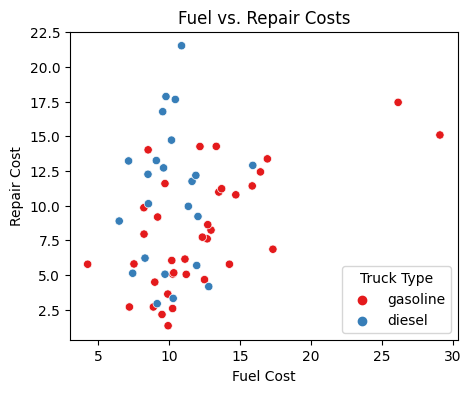

In [16]:
#C

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='Fuel', y='Repair', hue='Type', palette='Set1')

# Set plot title and labels
plt.title('Fuel vs. Repair Costs')
plt.xlabel('Fuel Cost')
plt.ylabel('Repair Cost')

# Show plot
plt.legend(title='Truck Type')
plt.show()


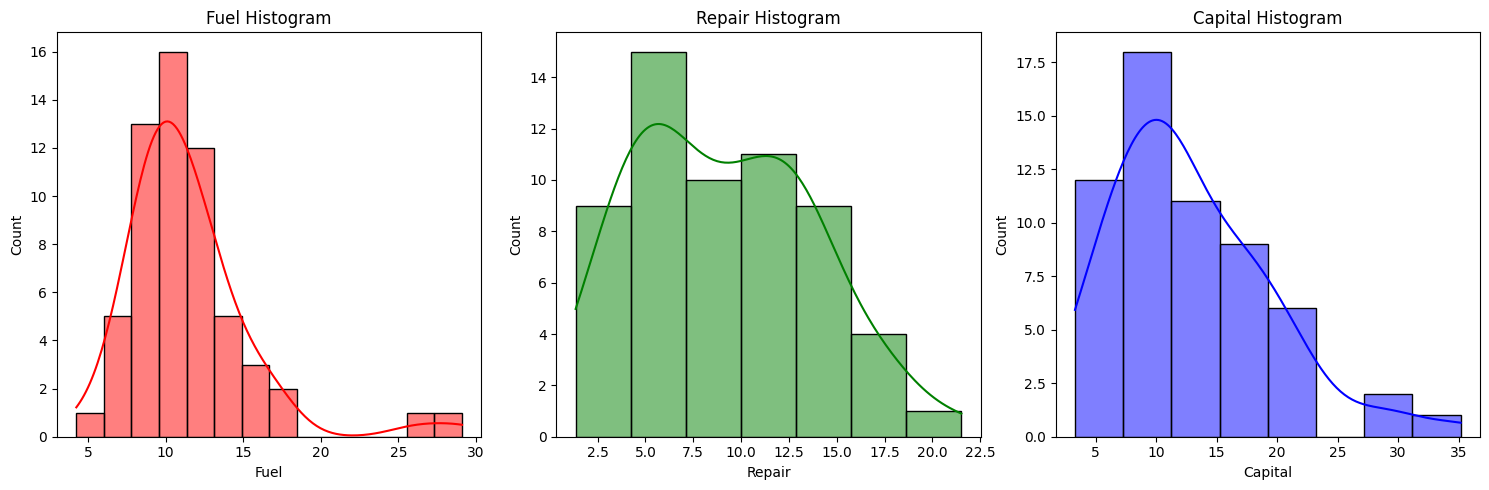

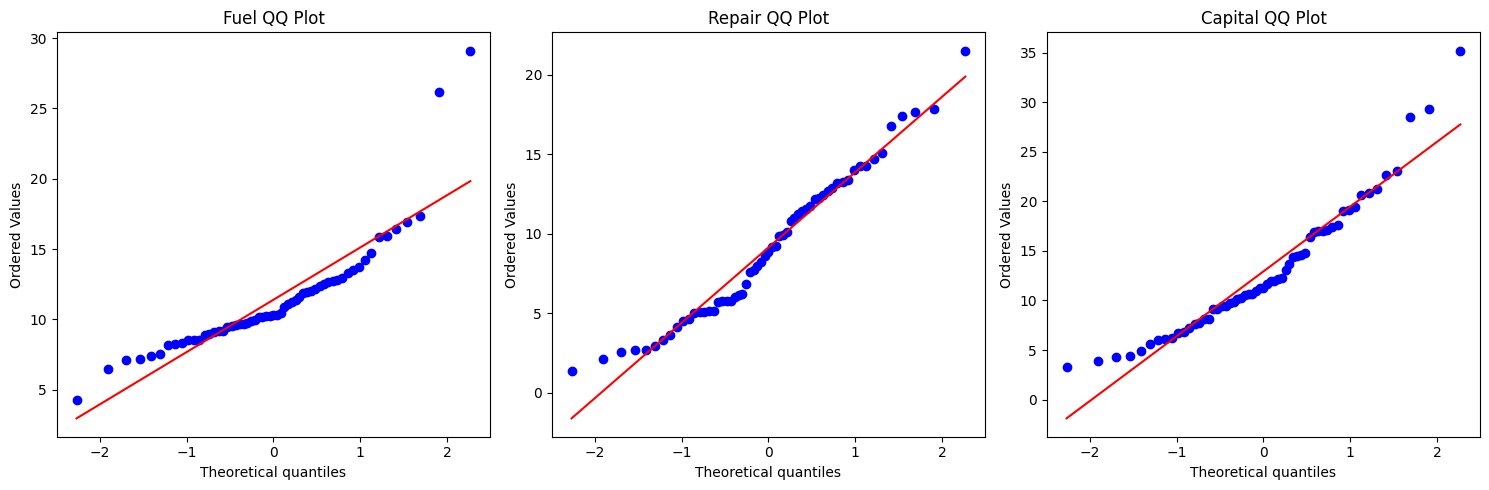

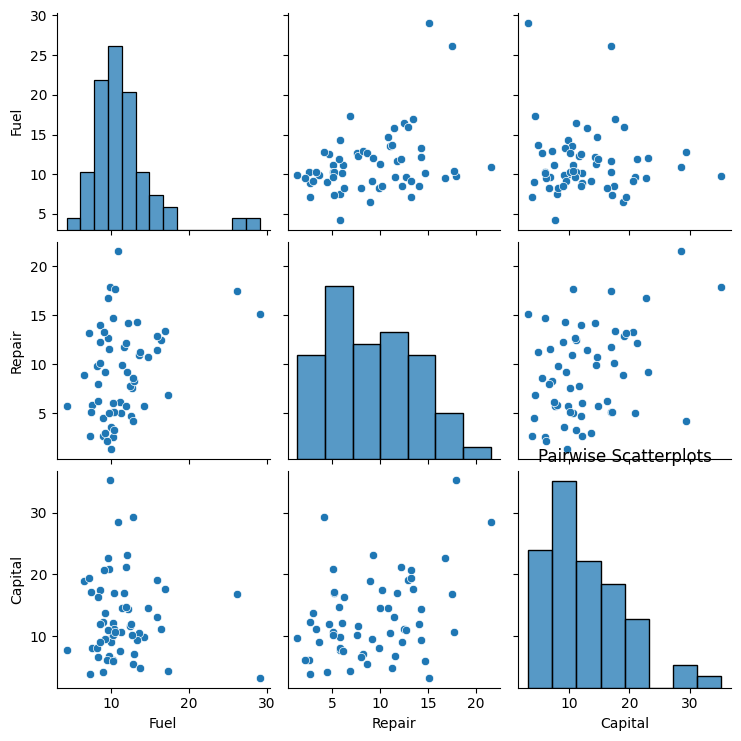

In [17]:
# D
from scipy import stats

# Define the data
data = df[['Fuel', 'Repair', 'Capital']]

# Univariate histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Fuel'], kde=True,color='r')
plt.title('Fuel Histogram')

plt.subplot(1, 3, 2)
sns.histplot(data['Repair'], kde=True,color='g')
plt.title('Repair Histogram')

plt.subplot(1, 3, 3)
sns.histplot(data['Capital'], kde=True,color='blue')
plt.title('Capital Histogram')

plt.tight_layout()
plt.show()

# Univariate probability plots (QQ plots)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
stats.probplot(data['Fuel'], dist="norm", plot=plt)
plt.title('Fuel QQ Plot')

plt.subplot(1, 3, 2)
stats.probplot(data['Repair'], dist="norm", plot=plt)
plt.title('Repair QQ Plot')

plt.subplot(1, 3, 3)
stats.probplot(data['Capital'], dist="norm", plot=plt)
plt.title('Capital QQ Plot')

plt.tight_layout()
plt.show()

# Pairwise scatterplots
sns.pairplot(data)
plt.title('Pairwise Scatterplots')
plt.show()


In [18]:
# E
from scipy.stats import f

# Given population mean vectors
mu0 = np.array([12, 8, 10])
mu1 = np.array([10, 18, 10])
mu2 = np.array([11, 9, 13])

x_bar = df[['Fuel', 'Repair', 'Capital']].mean().values

covariance_matrix = df[['Fuel', 'Repair', 'Capital']].cov().values

# Number of variables
p = len(mu0)

# Sample size (replace with actual sample size)
n = len(data)

# Compute the test statistics for each comparison
T2_0 = n * np.dot(np.dot((x_bar - mu0).T, np.linalg.inv(covariance_matrix)), (x_bar - mu0))
T2_1 = n * np.dot(np.dot((x_bar - mu1).T, np.linalg.inv(covariance_matrix)), (x_bar - mu1))
T2_2 = n * np.dot(np.dot((x_bar - mu2).T, np.linalg.inv(covariance_matrix)), (x_bar - mu2))

# Compute the critical value
alpha = 0.05
df1 = p
df2 = n - p
critical_value = f.ppf(1 - alpha, df1, df2)

print("Test statistics for mu0:", T2_0)
print("Test statistics for mu1:", T2_1)
print("Test statistics for mu2:", T2_2)
print("Critical value:", critical_value)

if T2_0 > critical_value:
    print("Reject null hypothesis for mu0")
else:
    print("Fail to reject null hypothesis for mu0")

if T2_1 > critical_value:
    print("Reject null hypothesis for mu1")
else:
    print("Fail to reject null hypothesis for mu1")

if T2_2 > critical_value:
    print("Reject null hypothesis for mu2")
else:
    print("Fail to reject null hypothesis for mu2")


Test statistics for mu0: 13.685004819813434
Test statistics for mu1: 397.4015237282895
Test statistics for mu2: 0.5543878178863463
Critical value: 2.7694309320231345
Reject null hypothesis for mu0
Reject null hypothesis for mu1
Fail to reject null hypothesis for mu2


In [19]:
# F
from scipy.stats import t,f

data = df[['Fuel', 'Repair', 'Capital']].values

# mean, std
means = np.mean(data, axis=0)
stds = np.std(data, axis=0, ddof=1)
n = len(data)
alpha = 0.05  # 95% confidence level

# Compute the t-value for the given alpha and degrees of freedom
t_value = t.ppf(1 - alpha / 2, df=n - 1)

# Compute individual confidence intervals for each variable
ci_lower = means - t_value * stds / np.sqrt(n)
ci_upper = means + t_value * stds / np.sqrt(n)

# Print the results
for i, var in enumerate(['Fuel', 'Repair', 'Capital']):
    print(f"Individual confidence interval for {var}: [{ci_lower[i]}, {ci_upper[i]}]")


Individual confidence interval for Fuel: [10.332430929149941, 12.457399579324635]
Individual confidence interval for Repair: [7.920558884572715, 10.370288573054404]
Individual confidence interval for Capital: [11.206908040222828, 14.661227552997516]


In [20]:
# mean, covariance matrix
means = np.mean(data, axis=0)
covariance_matrix = np.cov(data, rowvar=False)

# Number of observations and variables
n = len(data)
p = len(data[0])

# Compute the F-statistic for the given alpha and degrees of freedom
alpha = 0.05  # 95% confidence level
f_statistic = f.ppf(1 - alpha / 2, p, n - p)

# Compute the T2 statistics for each observation
t2_stats = np.sum(((data - means) @ np.linalg.inv(covariance_matrix)) * (data - means), axis=1)

# Compute the simultaneous T2 confidence intervals
ci_multiplier = np.sqrt(f_statistic * p * (n - 1) / (n * (n - p)))
ci_lower = np.zeros_like(means)
ci_upper = np.zeros_like(means)
for i in range(p):
    ci_lower[i] = means[i] - ci_multiplier * np.sqrt(covariance_matrix[i, i])
    ci_upper[i] = means[i] + ci_multiplier * np.sqrt(covariance_matrix[i, i])

# Print the results
for i, var in enumerate(['Fuel', 'Repair', 'Capital']):
    print(f"Simultaneous T2 confidence interval for {var}: [{ci_lower[i]}, {ci_upper[i]}]")


Simultaneous T2 confidence interval for Fuel: [9.680032498141276, 13.1097980103333]
Simultaneous T2 confidence interval for Repair: [7.168453762913902, 11.122393694713217]
Simultaneous T2 confidence interval for Capital: [10.146378215393854, 15.72175737782649]


In [21]:
# Compute the F-statistic for the given alpha and degrees of freedom
alpha_bonferroni = alpha / len(data[0])
f_statistic_bonferroni = f.ppf(1 - alpha_bonferroni / 2, p, n - p)

# Compute the T2 statistics for each observation
t2_stats = np.sum(((data - means) @ np.linalg.inv(covariance_matrix)) * (data - means), axis=1)

# Compute the simultaneous T2 confidence intervals with Bonferroni correction
ci_multiplier_bonferroni = np.sqrt(f_statistic_bonferroni * p * (n - 1) / (n * (n - p)))
ci_lower_bonferroni = np.zeros_like(means)
ci_upper_bonferroni = np.zeros_like(means)
for i in range(p):
    ci_lower_bonferroni[i] = means[i] - ci_multiplier_bonferroni * np.sqrt(covariance_matrix[i, i])
    ci_upper_bonferroni[i] = means[i] + ci_multiplier_bonferroni * np.sqrt(covariance_matrix[i, i])

# Print the results
for i, var in enumerate(['Fuel', 'Repair', 'Capital']):
    print(f"Simultaneous T2 confidence interval with Bonferroni correction for {var}: [{ci_lower_bonferroni[i]}, {ci_upper_bonferroni[i]}]")


Simultaneous T2 confidence interval with Bonferroni correction for Fuel: [9.452133917065346, 13.33769659140923]
Simultaneous T2 confidence interval with Bonferroni correction for Repair: [6.905725218669893, 11.385122238957226]
Simultaneous T2 confidence interval with Bonferroni correction for Capital: [9.775909448487798, 16.092226144732546]


The widest confidence intervals are observed in the simultaneous T2 confidence intervals with Bonferroni correction, while the narrowest confidence intervals are observed in the individual confidence intervals for Fuel, Repair, and Capital costs. This is because the simultaneous T2 confidence intervals with Bonferroni correction adjust for multiple comparisons, resulting in wider intervals to maintain the desired overall confidence level.